In [1]:
import os

assert os.environ['CONDA_DEFAULT_ENV']=='lk2'

In [2]:
import lightkurve as lk
%matplotlib inline

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/jp/.lightkurve/cache. Please move all the files in the legacy directory /home/jp/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [3]:
import pandas as pd

resonant_toi = pd.read_csv('../data/tics_resonance_from_toi.csv', index_col=0)
resonant_toi

tic 1st order  2nd order
0   425997655      True       True
1   142276270      True       True
2   150428135      True       True
3    29781292      True       True
4   269701147      True       True
5   307210830      True       True
6    54962195      True       True
7   318022259      True       True
8   259377017      True       True
9   441798995      True       True
10   77156829      True       True
11  120826158      True       True
12  233602827      True       True
13  374180079      True       True
14  143022742      True       True
15  153065527      True       True
16   55652896      True       True
17  360630575      True       True
18  367630162       NaN       True
19  178155732       NaN       True
20  441739020       NaN       True
21  392681545       NaN       True

In [21]:
import sys
sys.path.insert(0, '../code')
from utils import get_tois, get_ctois

df = get_tois()

Loaded:  ../data/TOIs.csv


In [5]:
tic = 54962195
d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
d[["Period (days)","Epoch (BJD)"]]

Period (days)   Epoch (BJD)
473       2.598905  2.458544e+06
474       4.695567  2.458543e+06
475       7.102747  2.458547e+06

In [6]:
result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
lc = result.download_all().stitch()

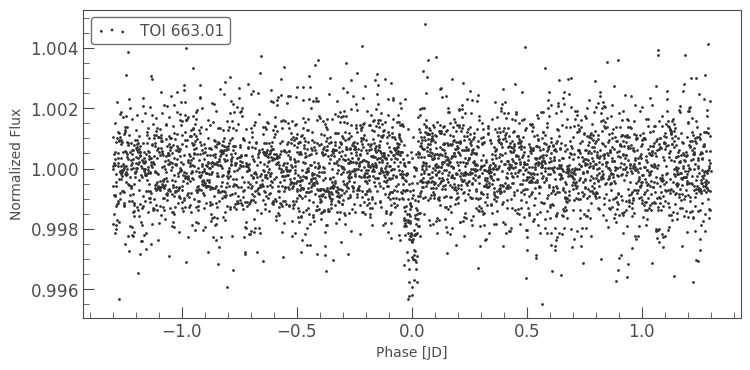

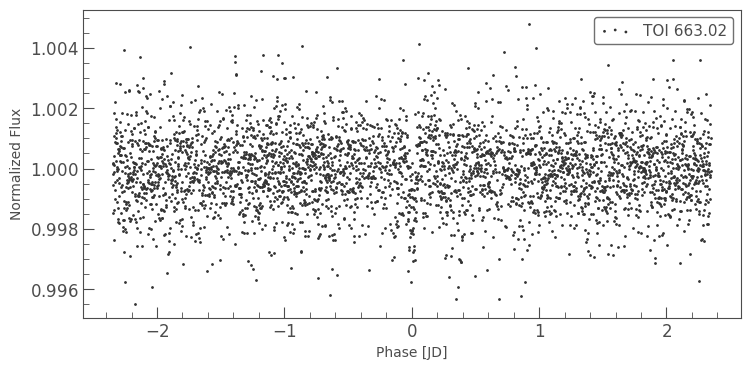

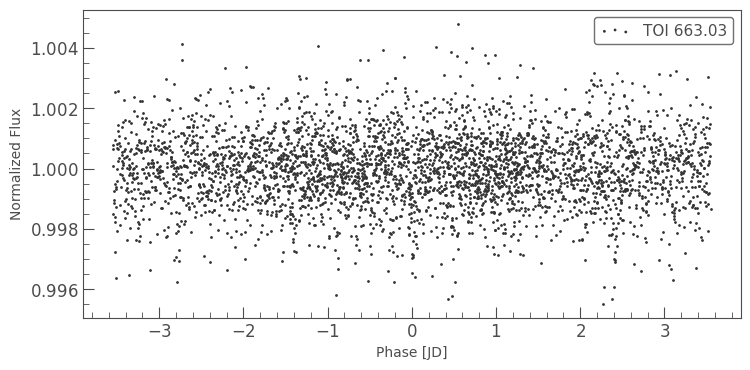

In [10]:
for i,row in d.iterrows():
    p, t0 = row["Period (days)"], row["Epoch (BJD)"] - 2457000
    fold = lc.flatten().fold(period=p, epoch_time=t0)
    ax = fold.scatter(label=f"TOI {row['TOI']}")

## check signs of Prot

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 21 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jp/miniconda3/envs/lk2/lib/python3.10/s

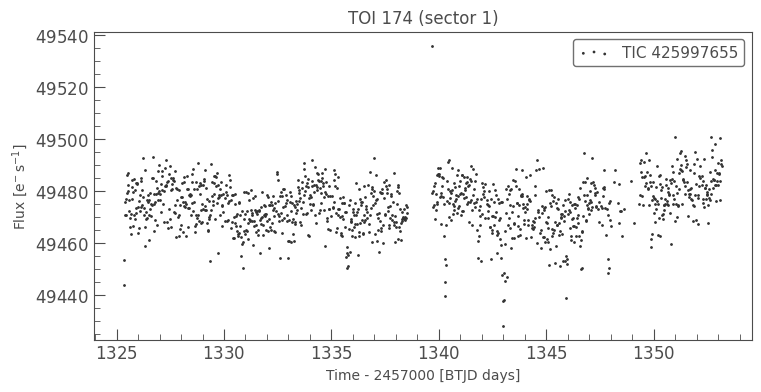

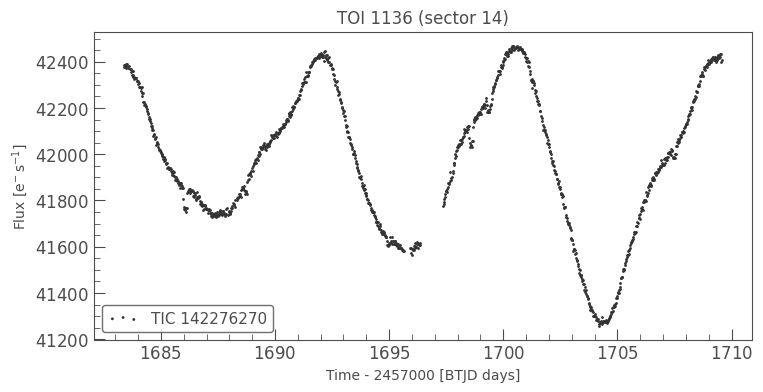

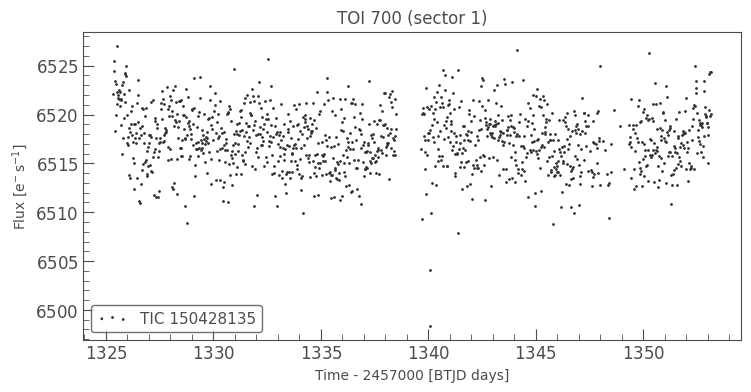

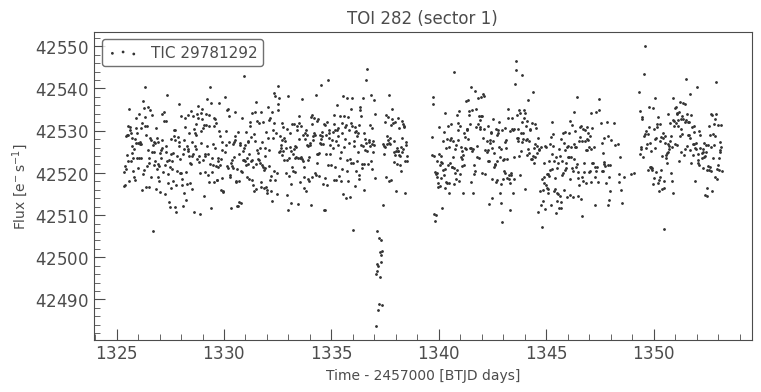

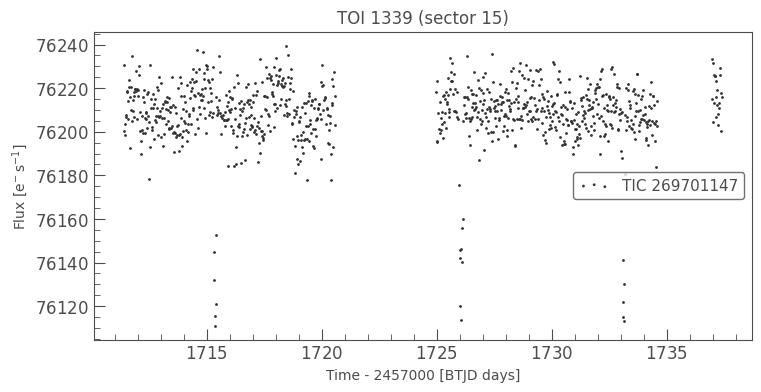

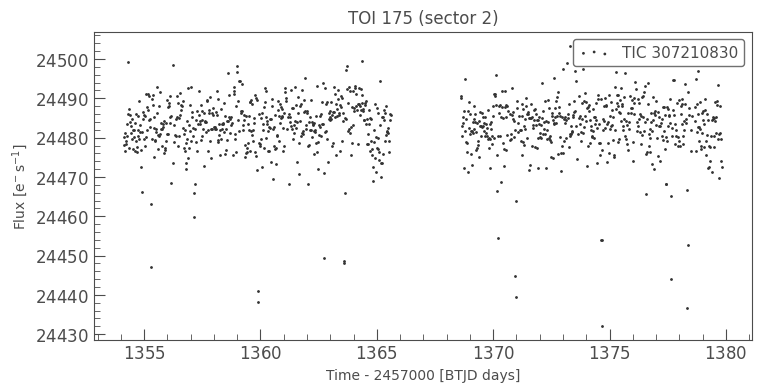

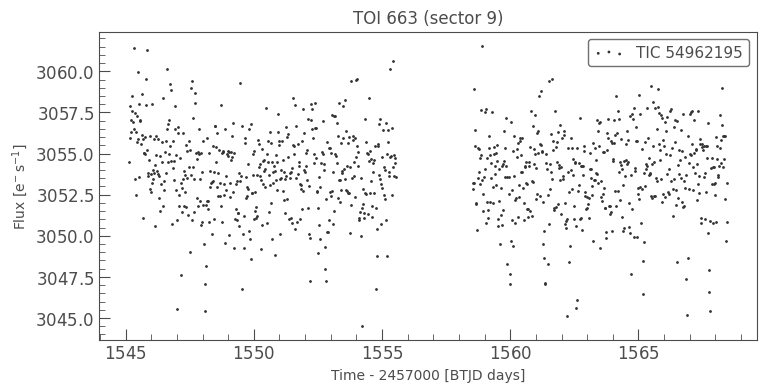

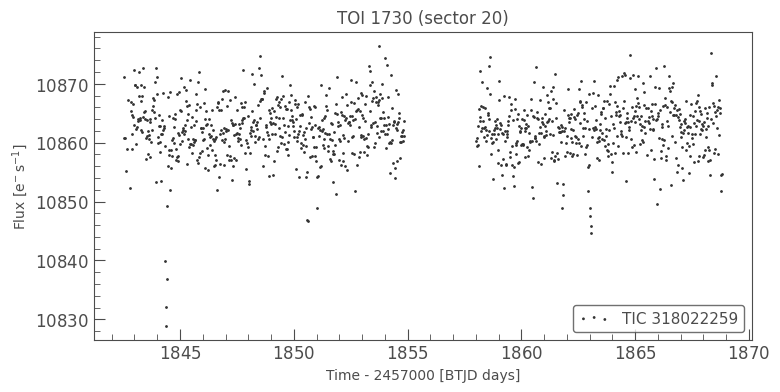

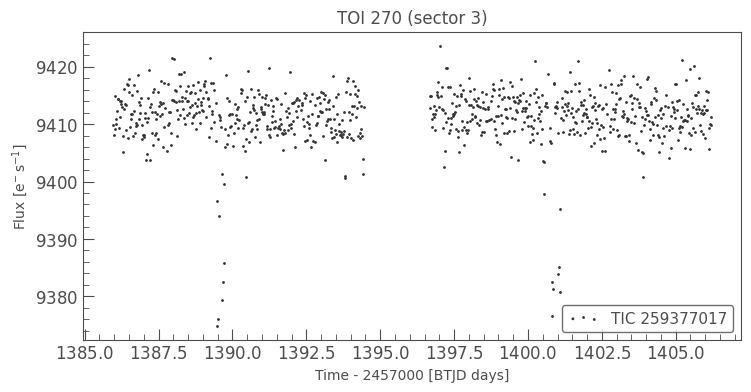

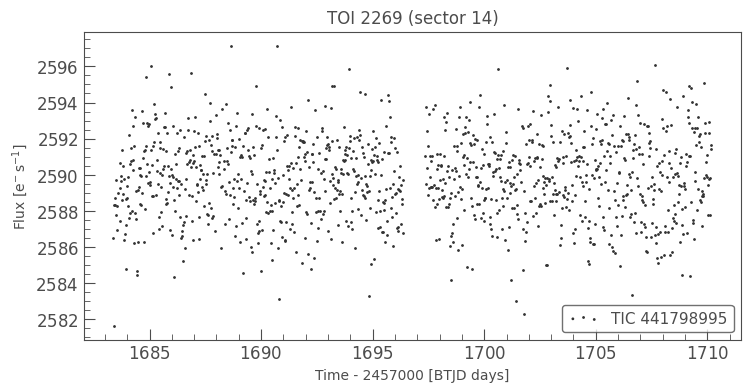

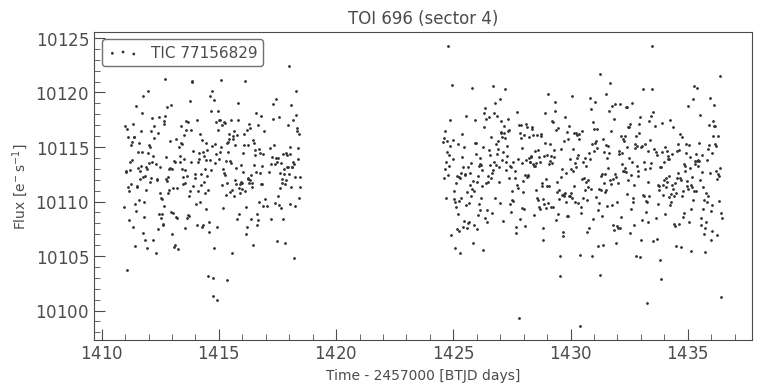

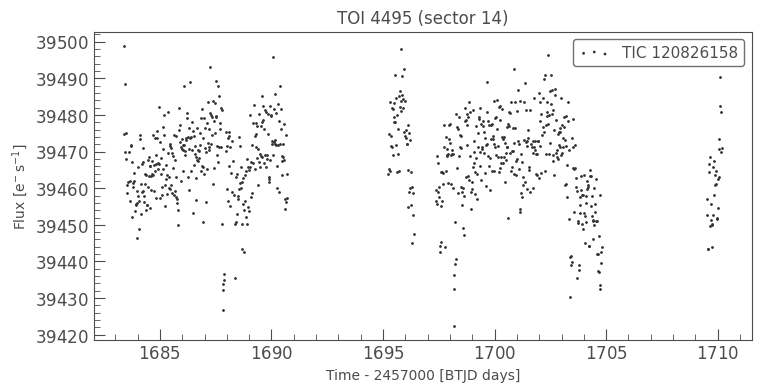

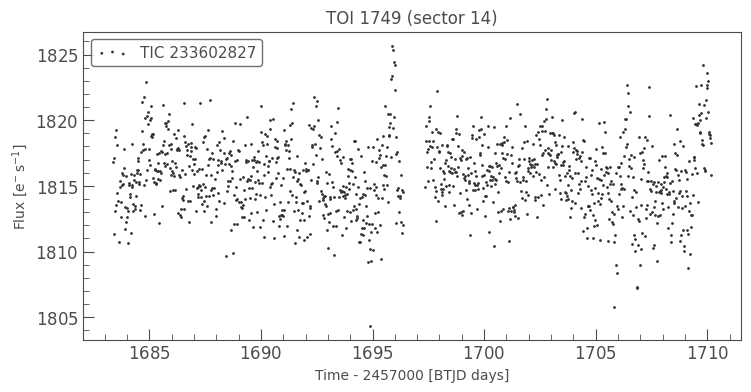

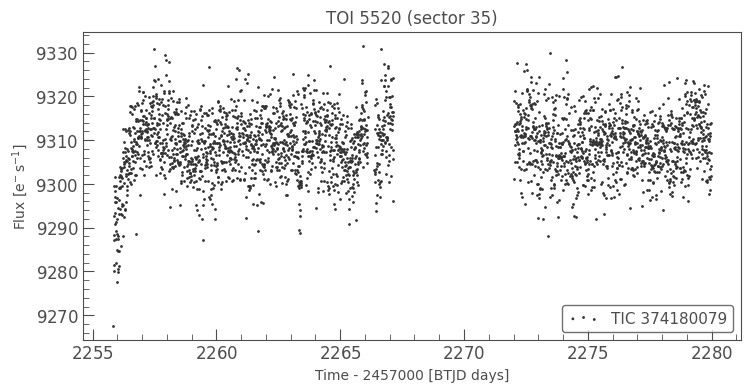

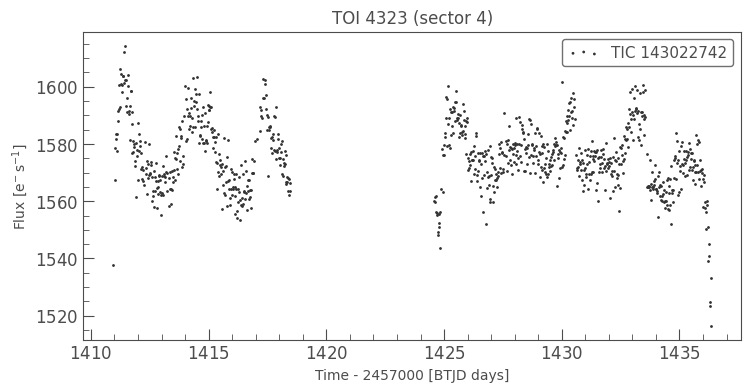

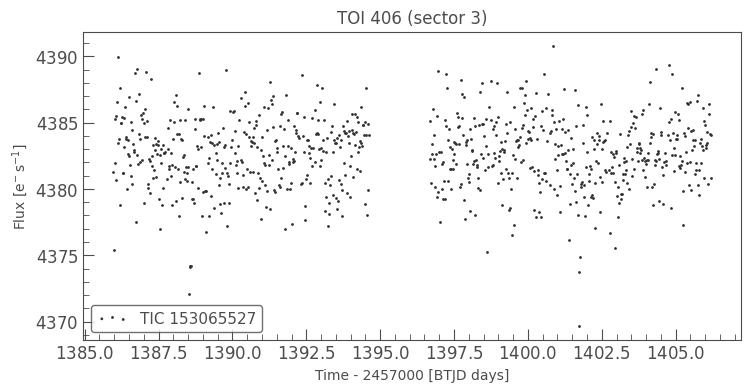

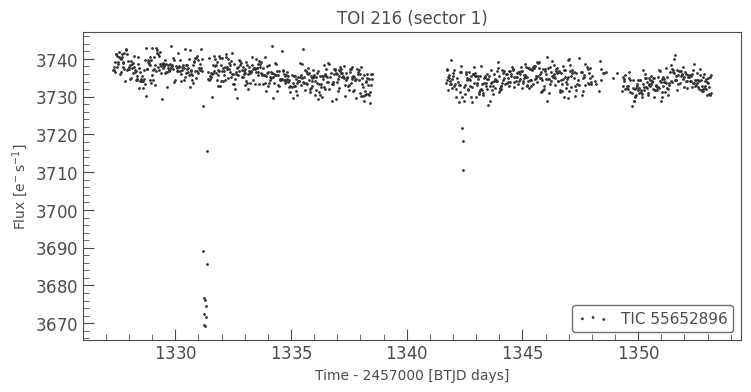

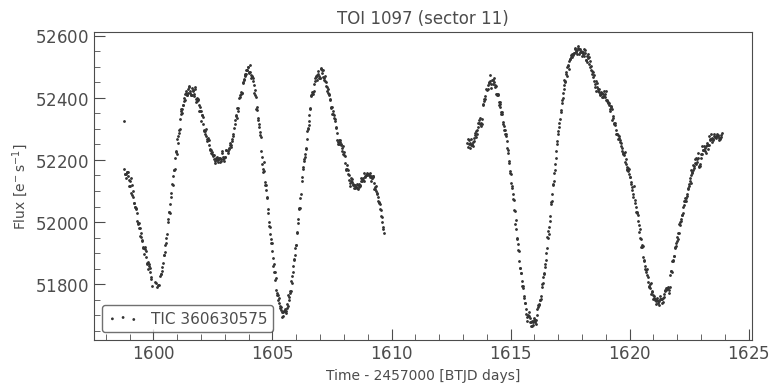

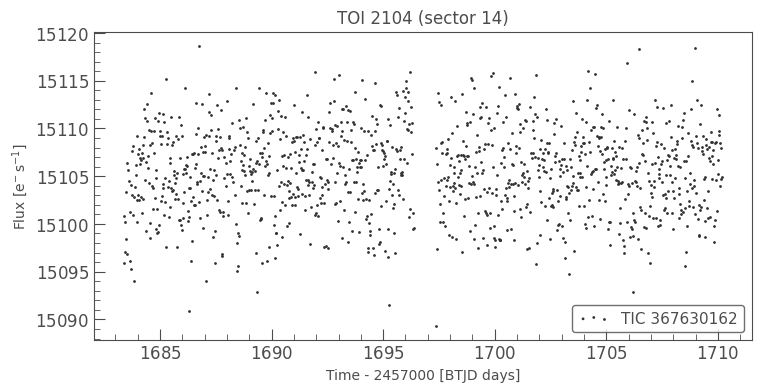

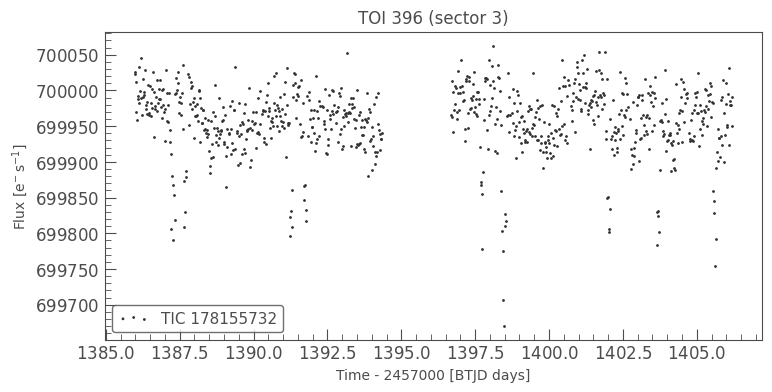

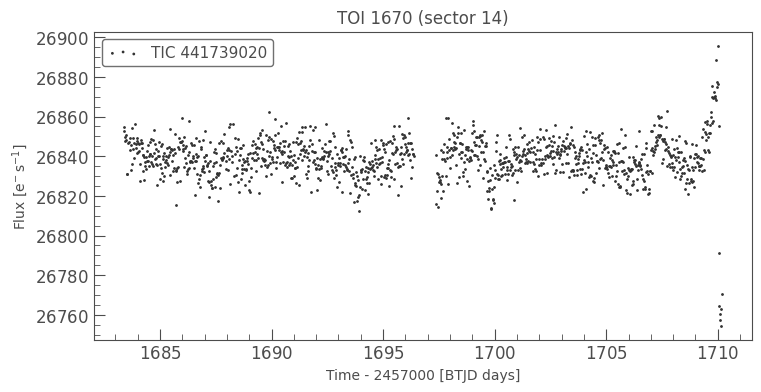

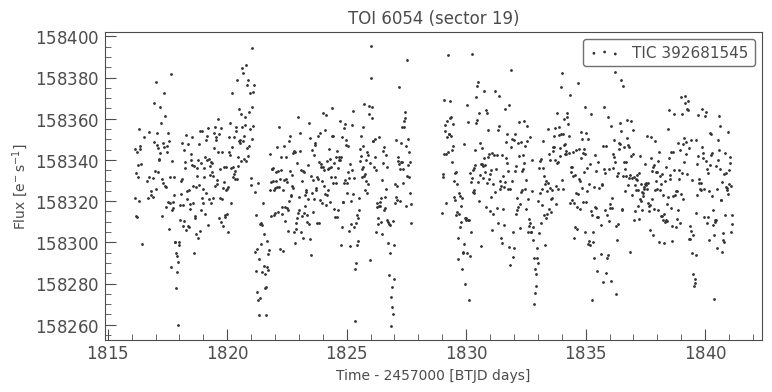

In [11]:
multi_sector = False

for i,row in resonant_toi.iterrows(): 
    tic = row['tic']
    d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
    toi = str(d.TOI.iloc[0]).split('.')[0]
    result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
    if result:
        if multi_sector:
            lc = result.download_all().stitch()
        else:
            lc = result.download()
        ax = lc.scatter()
        ax.set_title(f"TOI {toi} (sector {lc.sector})")

In [17]:
df[df['TIC ID'].isin([347332255])]['Period (days)']

1353    5.64196
1354    0.00000
Name: Period (days), dtype: float64

In [19]:
import pandas as pd

resonant_ctoi = pd.read_csv('../data/tics_resonance_from_ctoi.csv', index_col=0)
resonant_ctoi

tic 1st order  2nd order
0  204497617      True       True
1   29478974      True       True
2  207080350      True       True
3  347332255      True       True
4  253922296       NaN       True

In [22]:
df2 = get_ctois()

In [27]:
df[df['TIC ID'].isin([347332255])]['Period (days)']

1353    5.64196
1354    0.00000
Name: Period (days), dtype: float64

In [25]:
df2[df2['TIC ID'].isin([347332255])]['Period (days)']

2153     9.114
2154    13.674
Name: Period (days), dtype: float64

In [29]:
resonant_ctoi

tic 1st order  2nd order
0  204497617      True       True
1   29478974      True       True
2  207080350      True       True
3  347332255      True       True
4  253922296       NaN       True

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


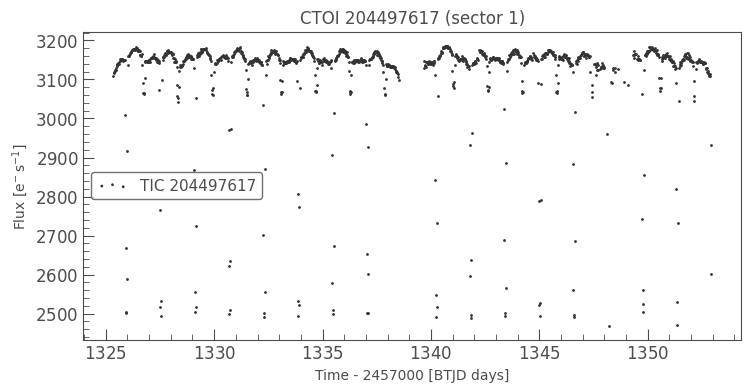

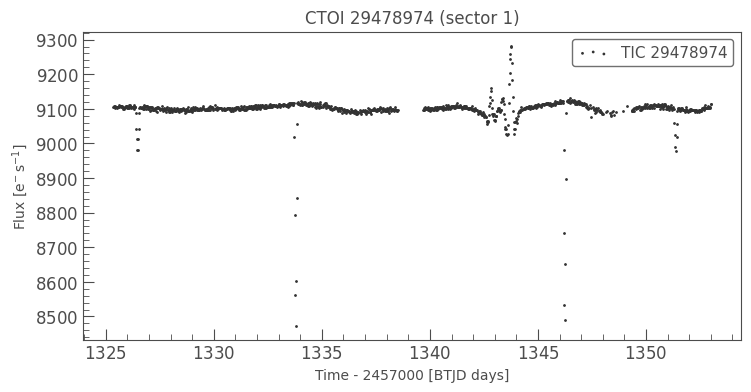

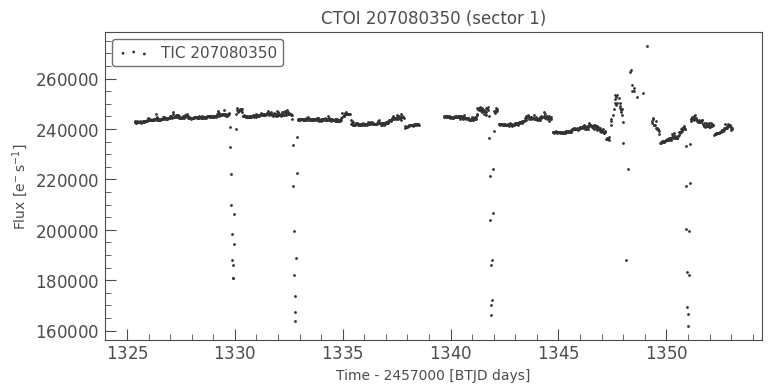

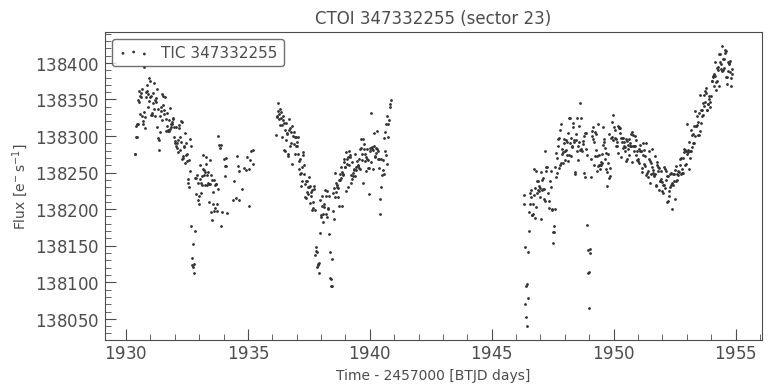

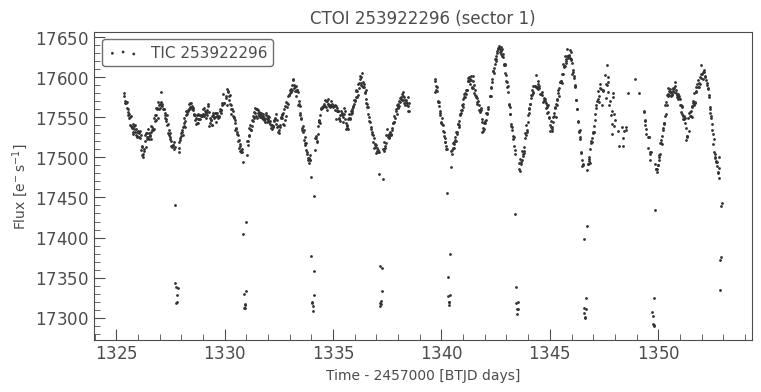

In [33]:
multi_sector = False

for i,row in resonant_ctoi.iterrows(): 
    tic = row['tic']
    d = df2[df2['TIC ID'].apply(str).str.contains(str(tic))]
    ctoi = str(d.CTOI.iloc[0]).split('.')[0]
    result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
    if result:
        if multi_sector:
            lc = result.download_all().stitch()
        else:
            lc = result.download()
        ax = lc.scatter()
        ax.set_title(f"CTOI {ctoi} (sector {lc.sector})")

## check transit signal

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/lightcurve.py:1948: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1)


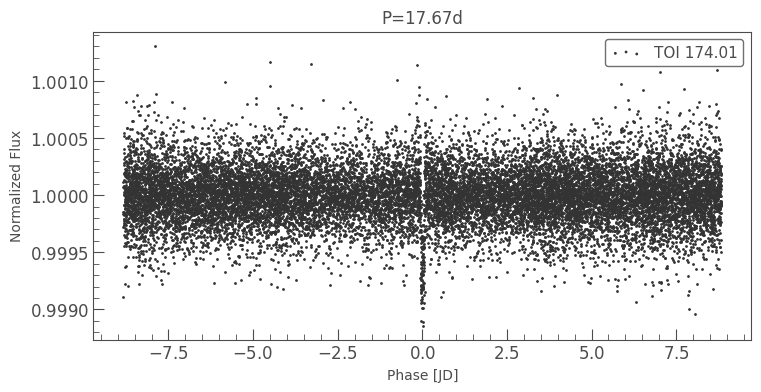

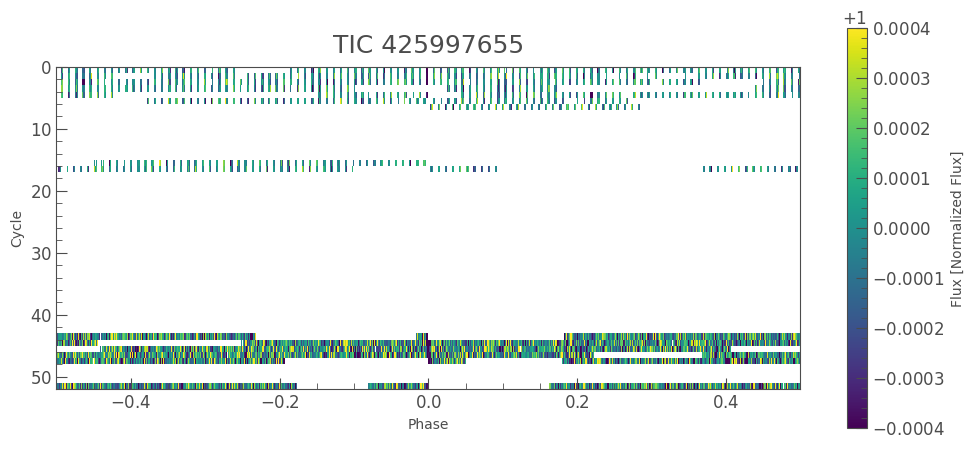

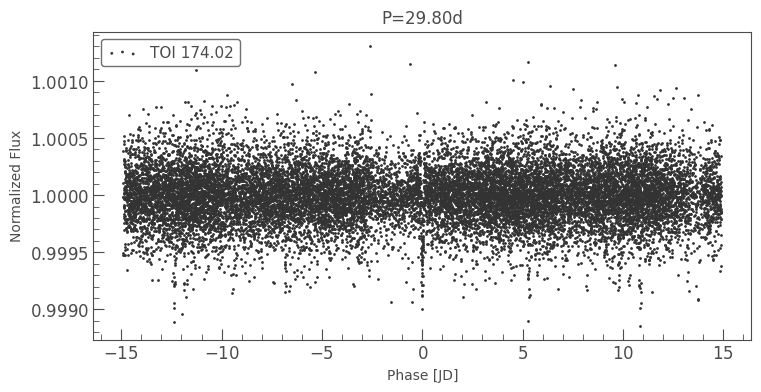

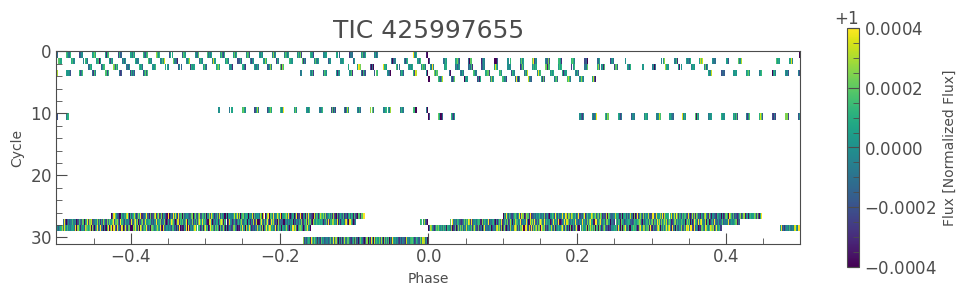

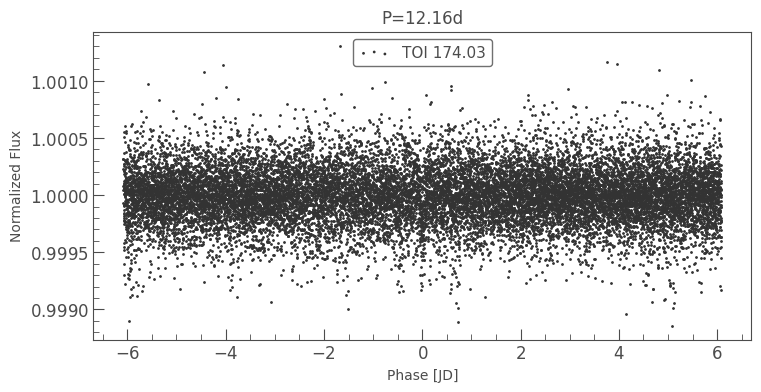

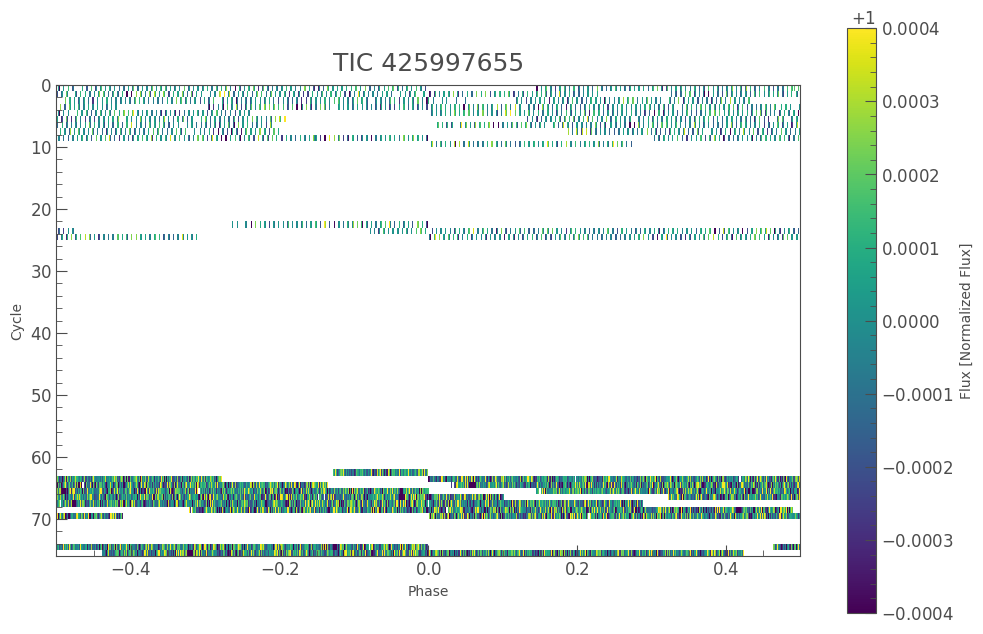

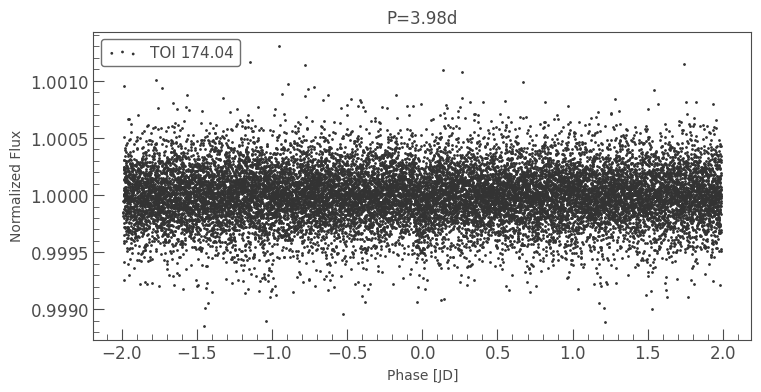

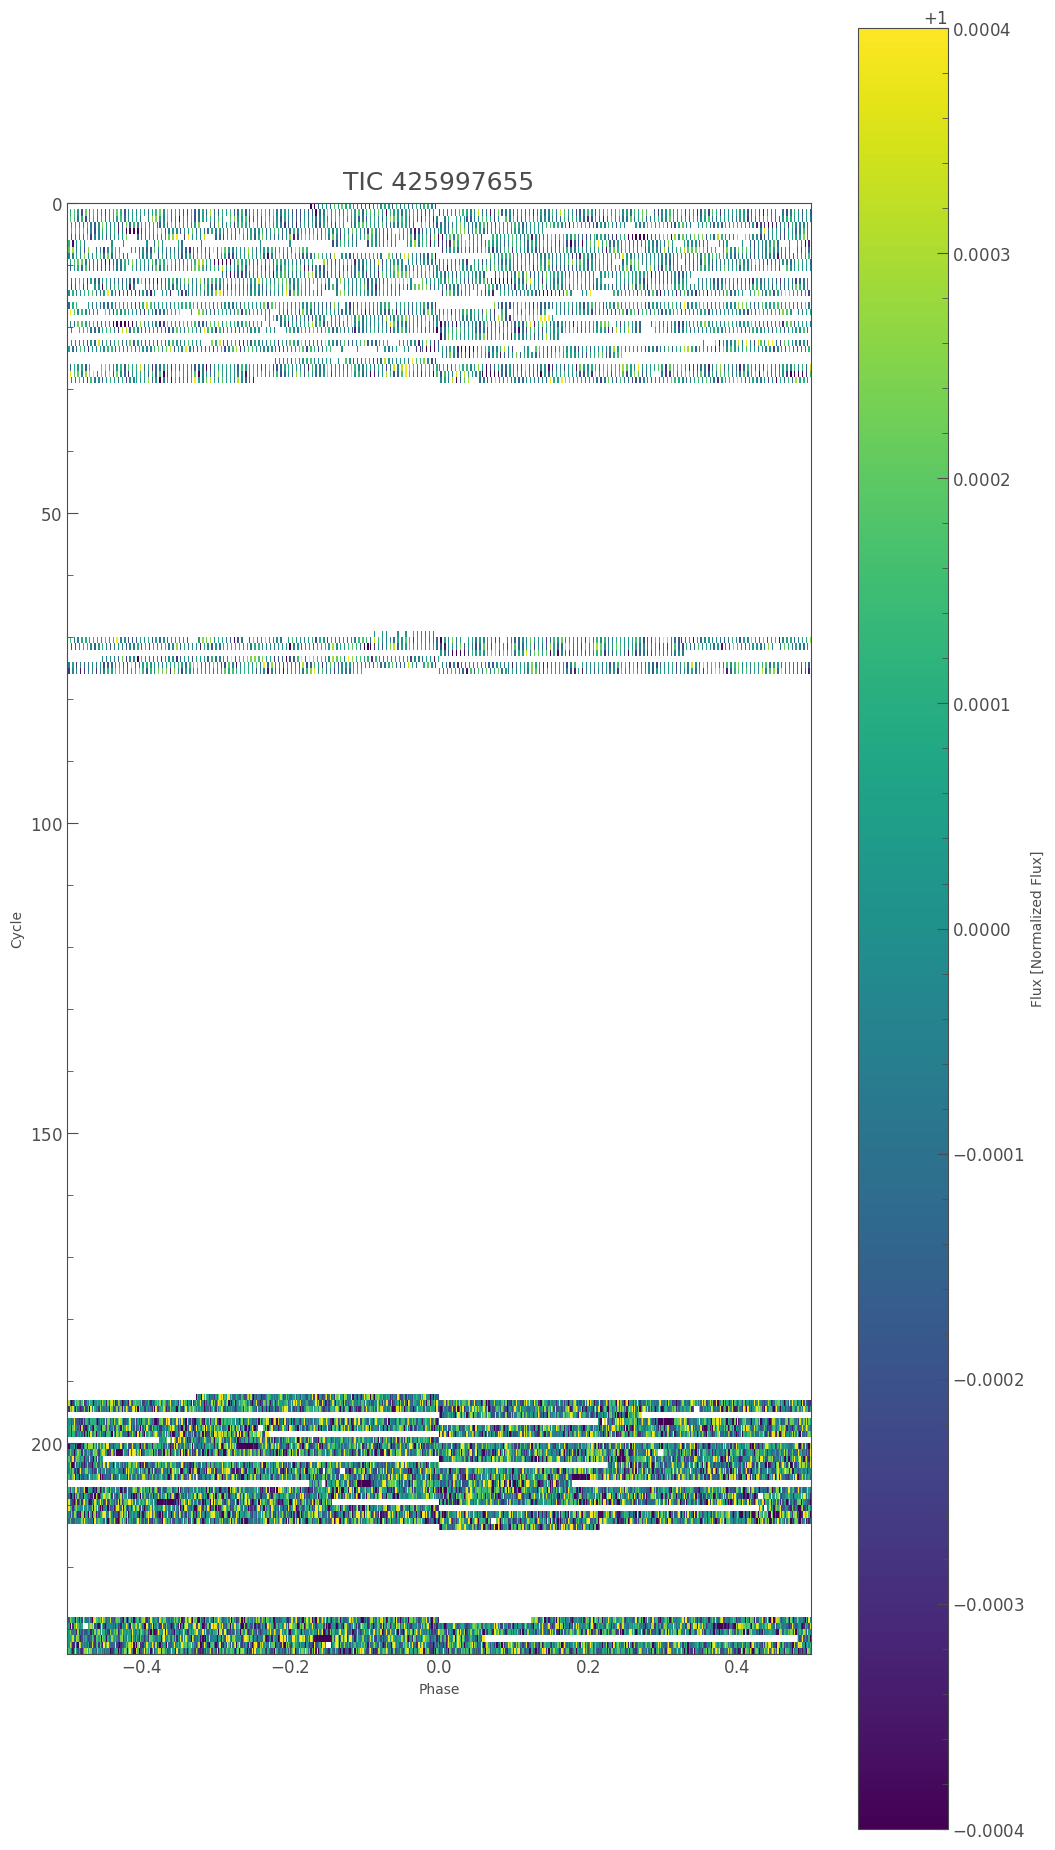

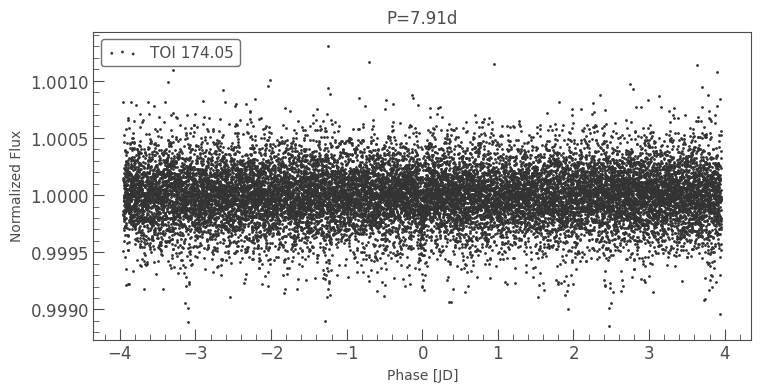

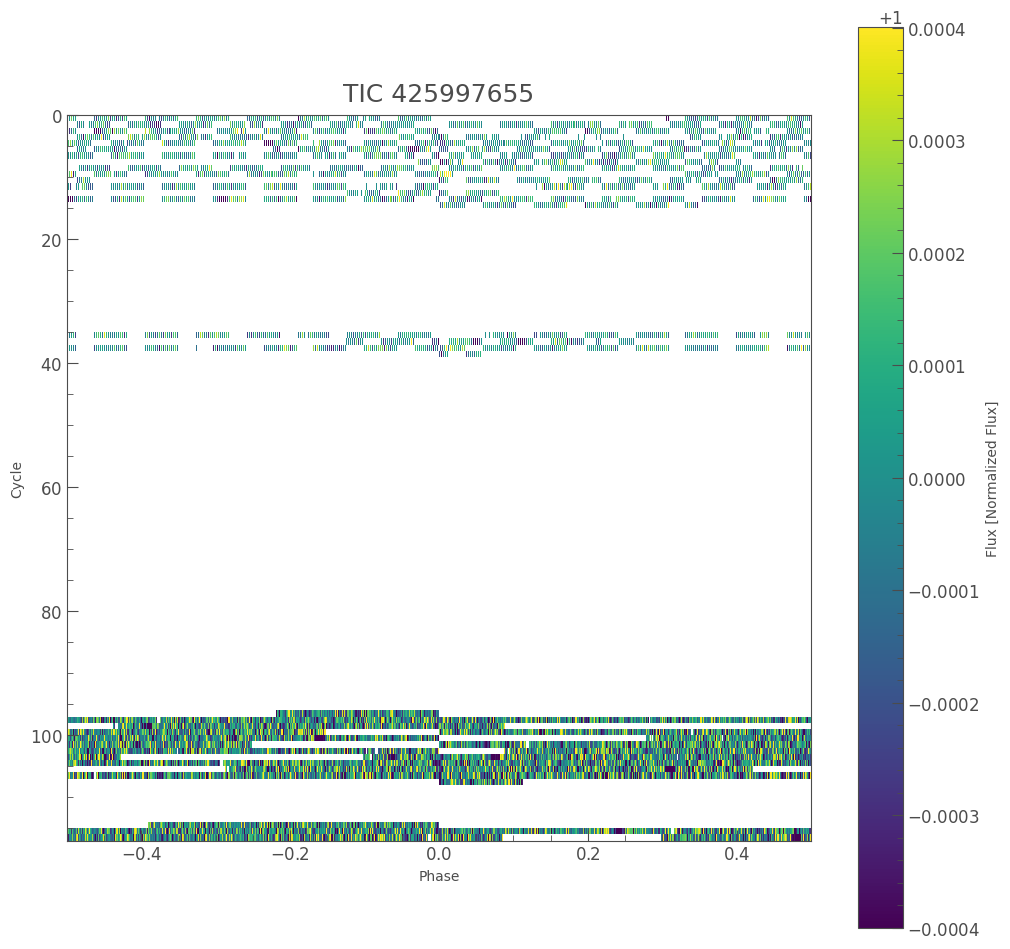

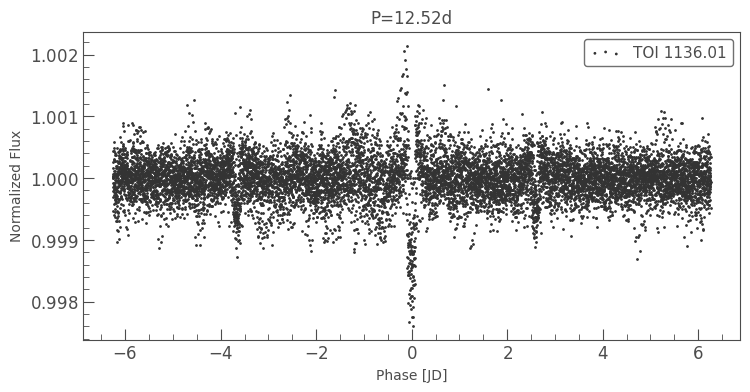

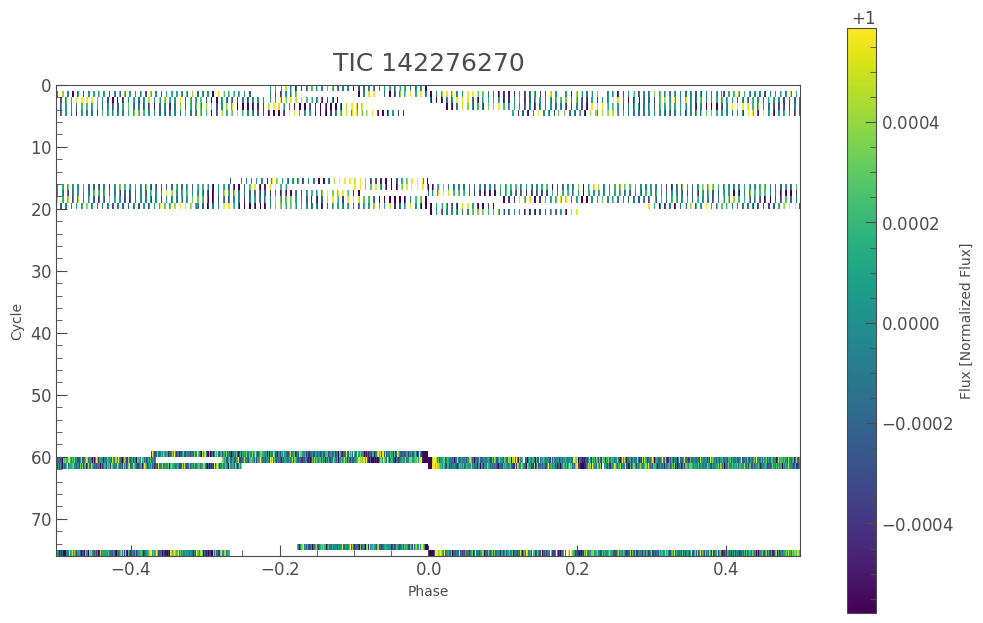

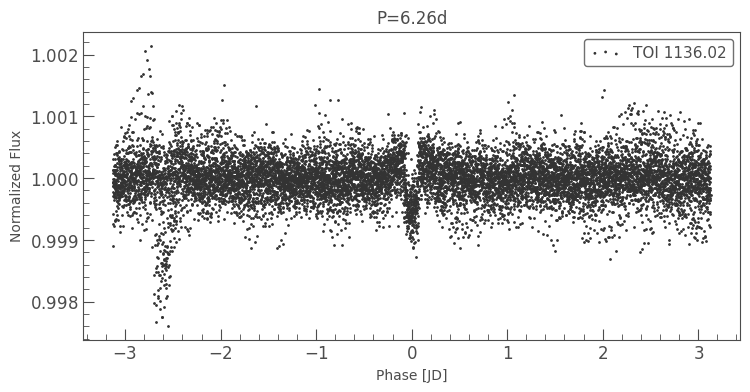

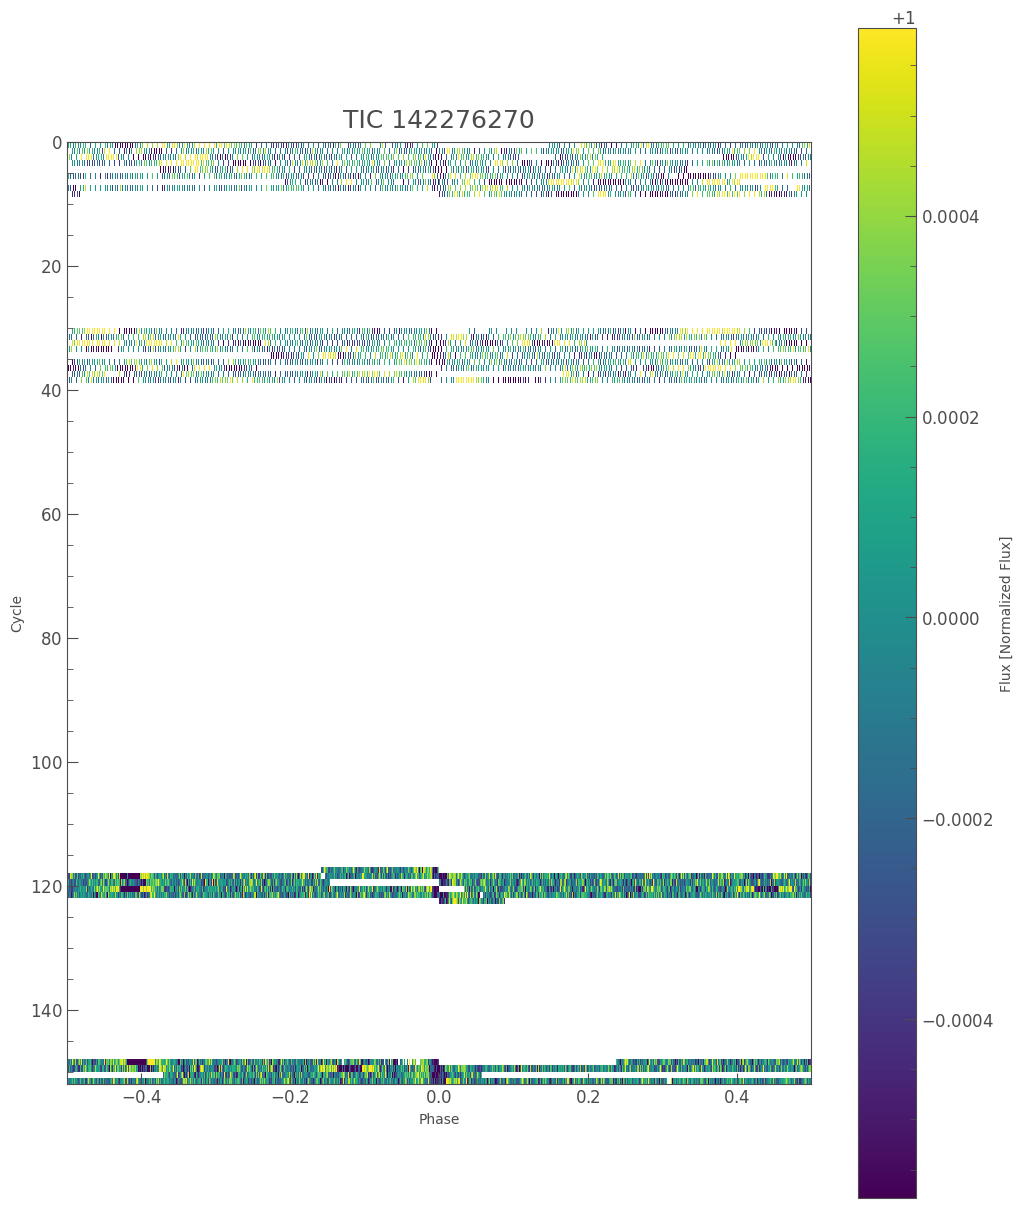

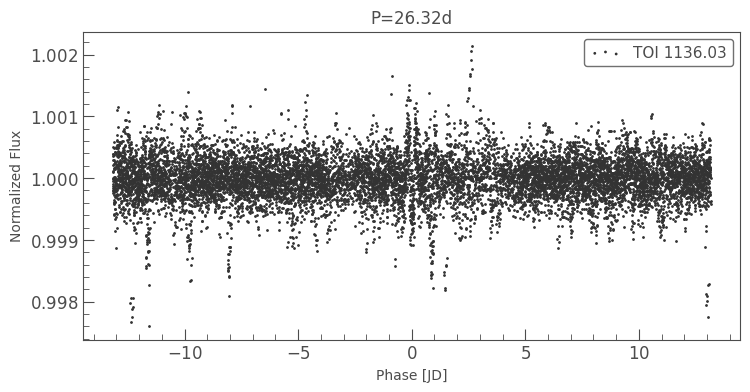

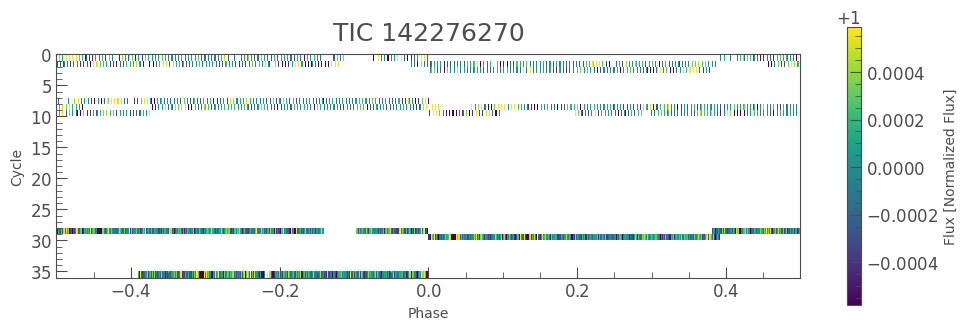

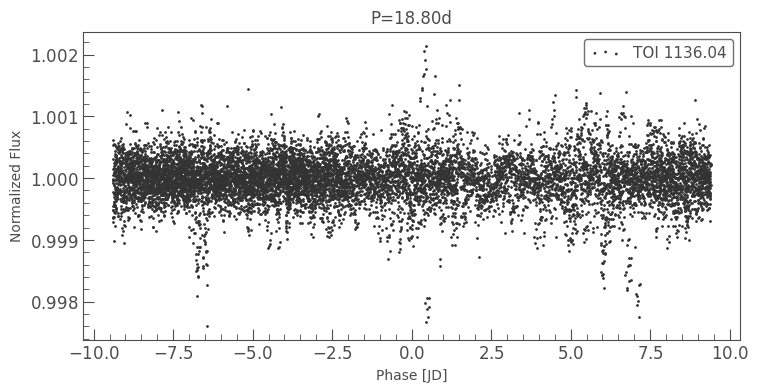

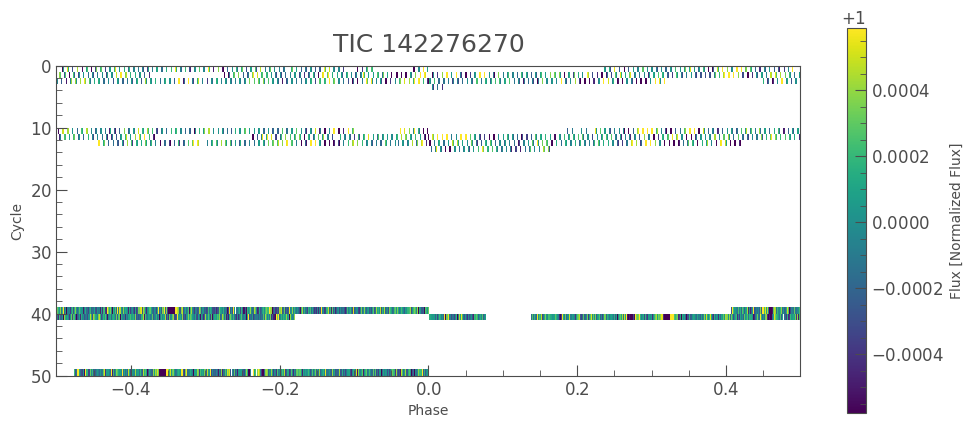

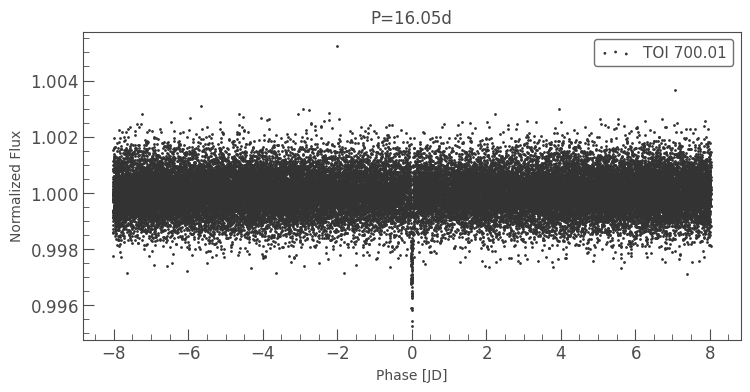

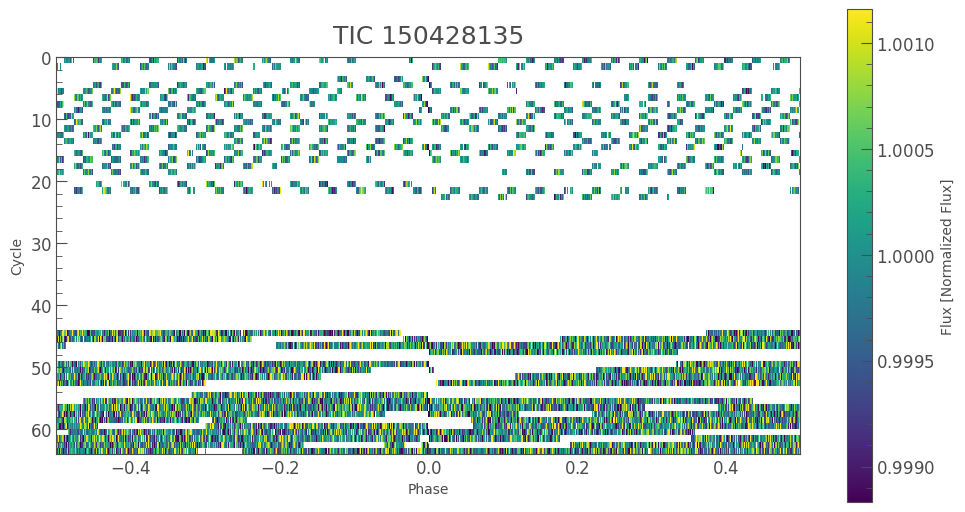

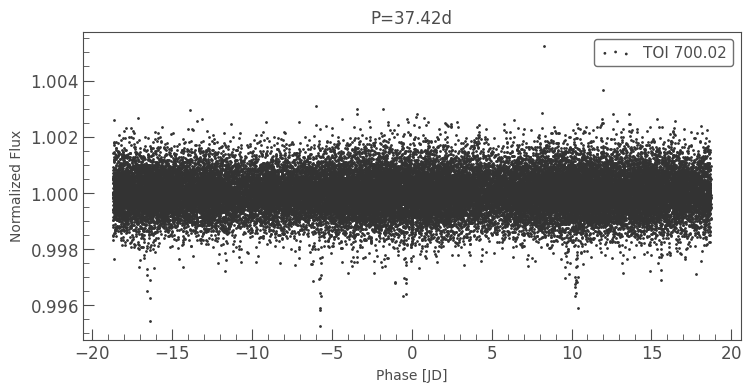

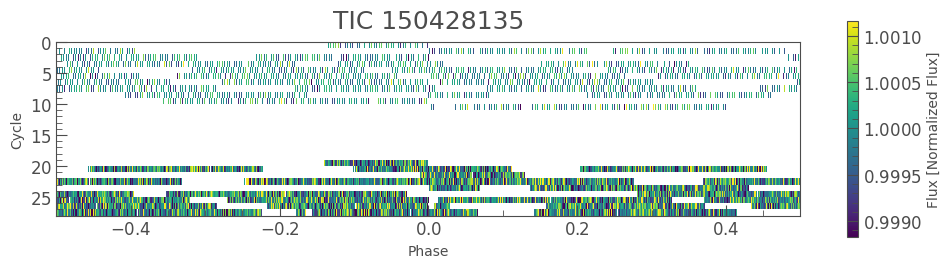

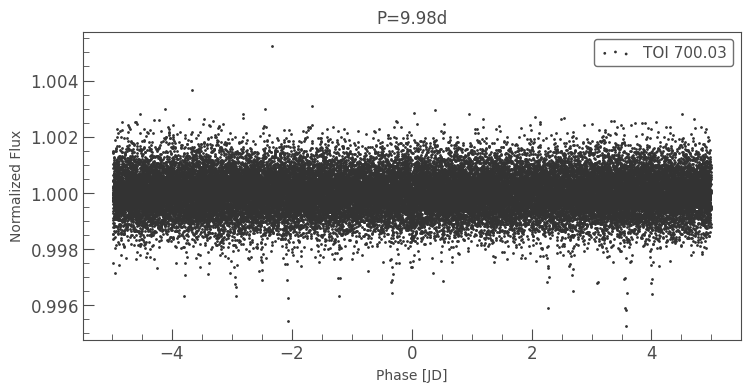

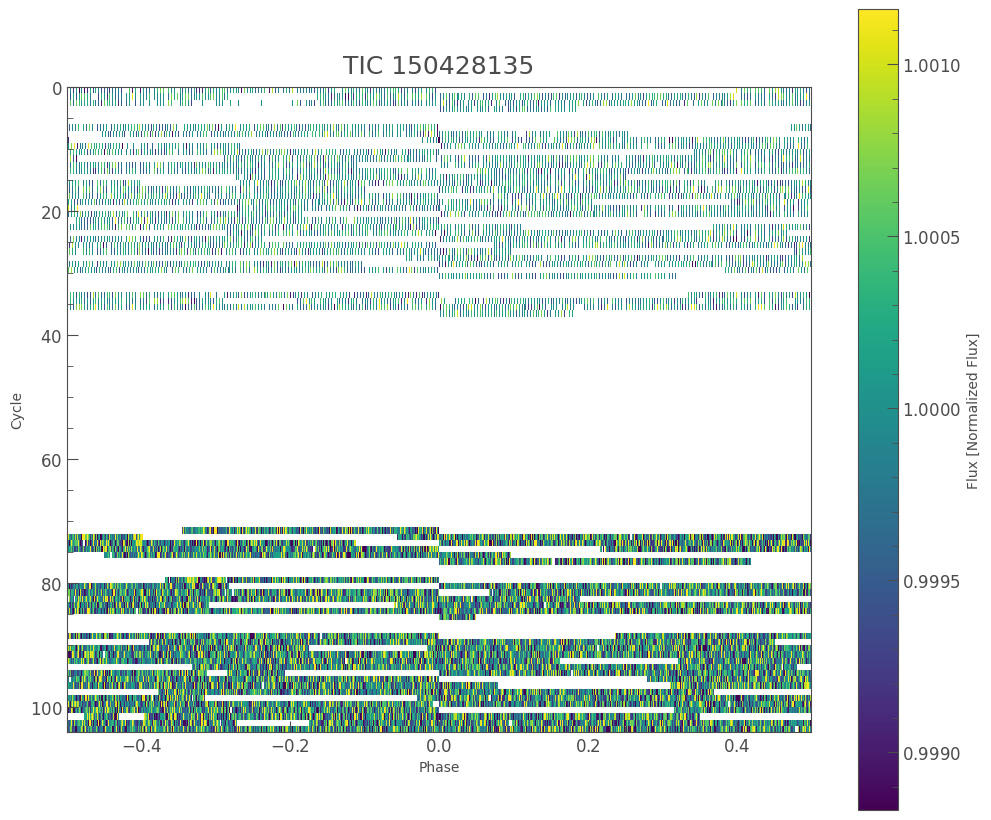

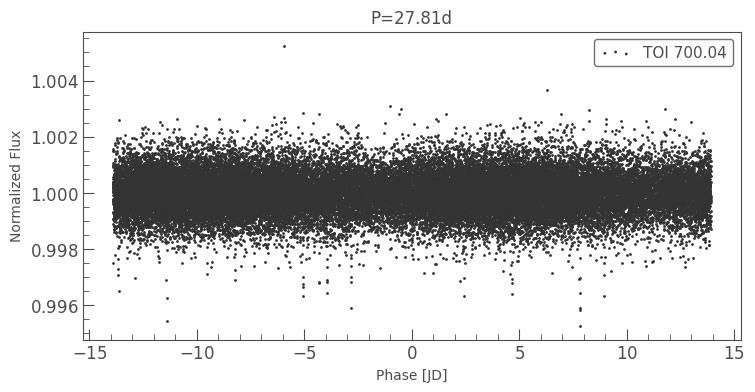

In [35]:
import matplotlib.pyplot as pl

multi_sector = False

for i,row in resonant_toi.iterrows():
    tic = row['tic']
    if i<3:
        d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
        result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
        if result:
            if multi_sector or (d["Period (days)"].max()>12):
                lc = result.download_all().stitch()
            else:
                lc = result.download()
            flat = lc.flatten()
            for i,row in d.iterrows():
                p, t0 = row["Period (days)"], row["Epoch (BJD)"]-2457000
                fold = flat.fold(period=p, epoch_time=t0)
                ax = fold.scatter(label=f"TOI {row['TOI']}")
                ax.set_title(f"P={p:.2f}d")
                if True:
                    fold.plot_river();
pl.close()

/home/jp/miniconda3/envs/lk2/lib/python3.10/site-packages/lightkurve/search.py:414: LightkurveWarning: Warning: 15 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


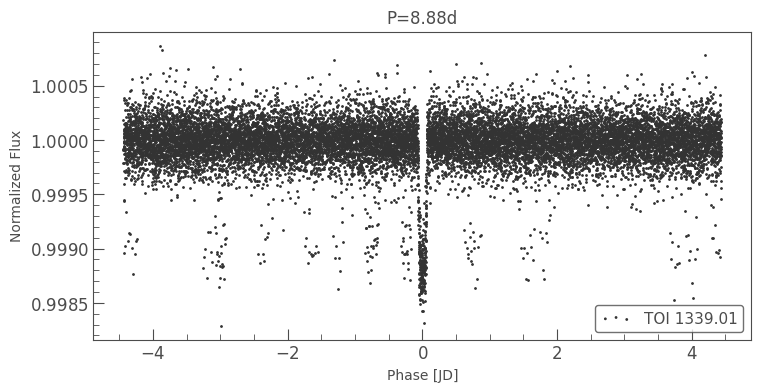

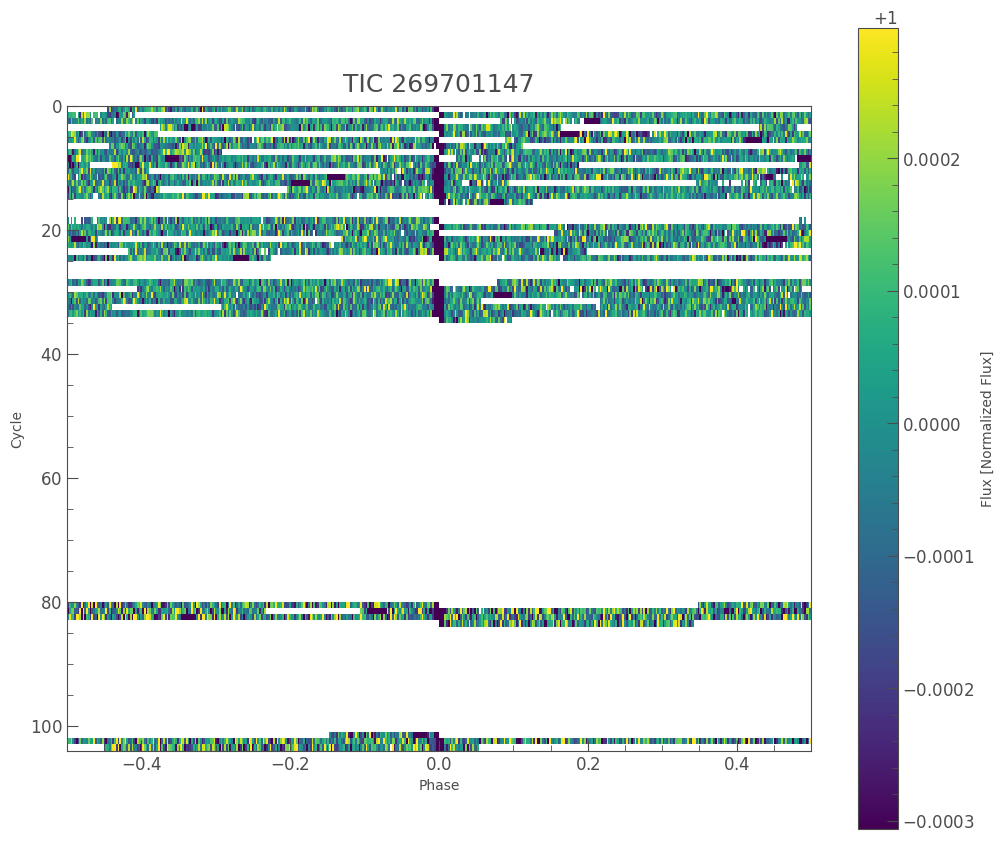

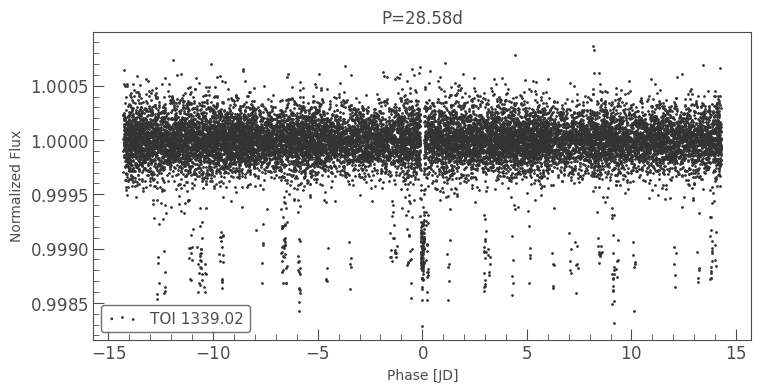

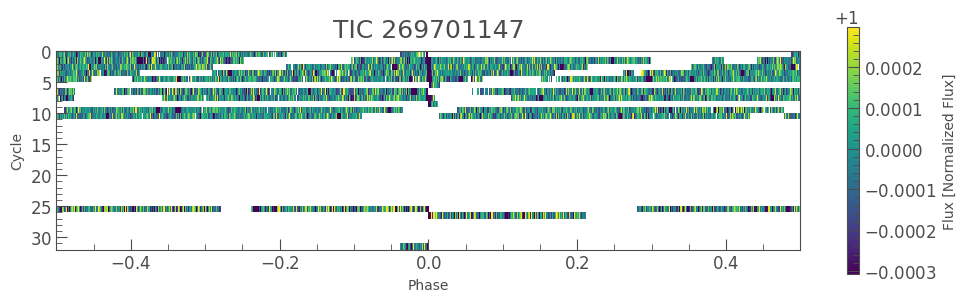

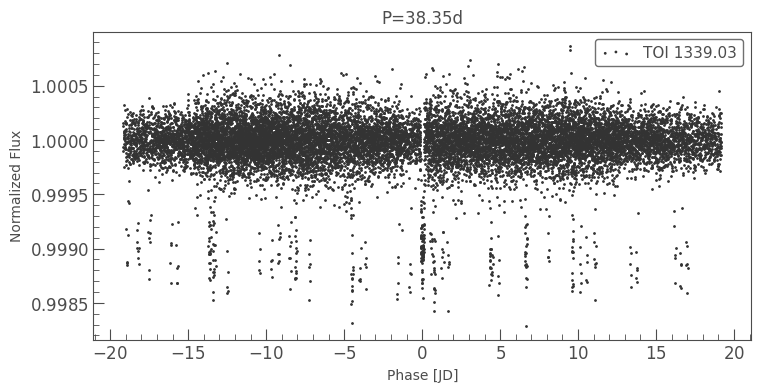

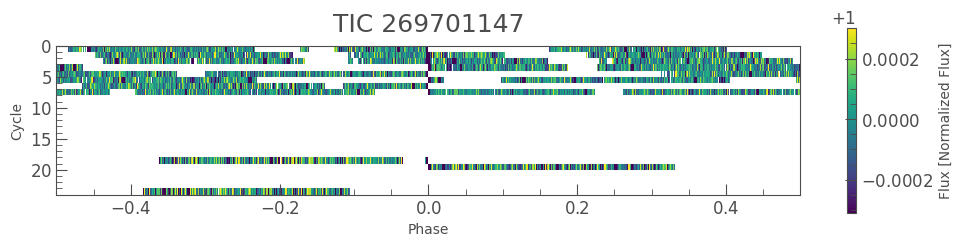

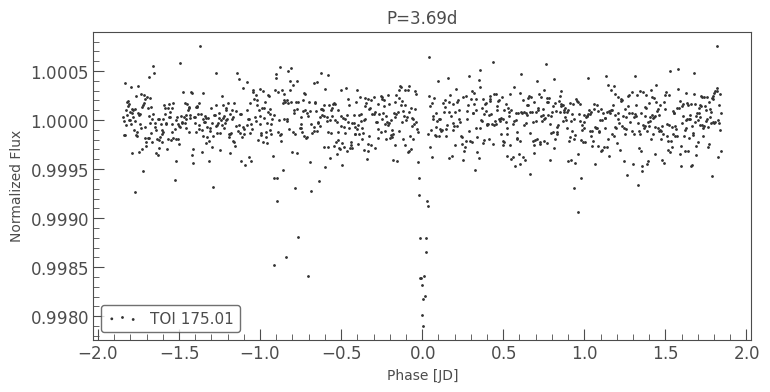

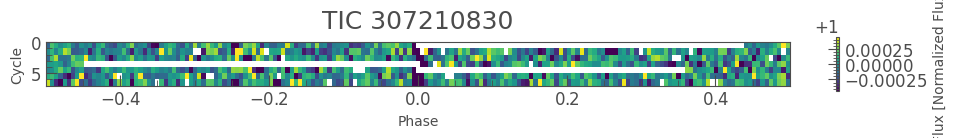

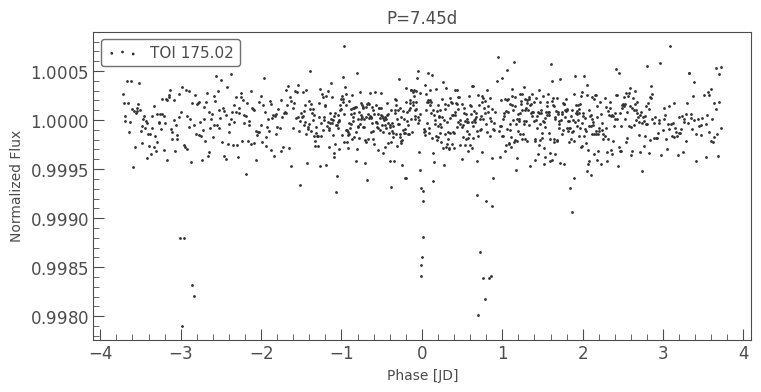

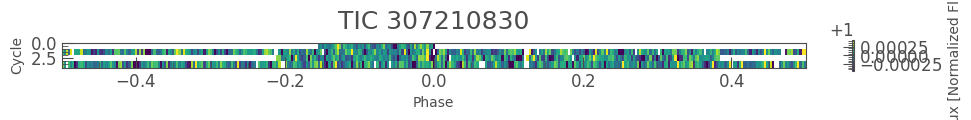

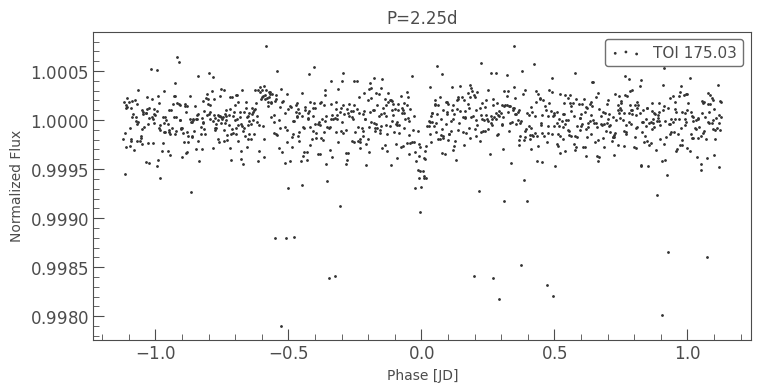

In [36]:
import matplotlib.pyplot as pl

multi_sector = False

for i,row in resonant_toi.iterrows():
    tic = row['tic']
    if (i>3) and (i<6):
        d = df[df['TIC ID'].apply(str).str.contains(str(tic))]
        result = lk.search_lightcurve(f'TIC {tic}', author='TESS-SPOC')
        if result:
            if multi_sector or (d["Period (days)"].max()>12):
                lc = result.download_all().stitch()
            else:
                lc = result.download()
            flat = lc.flatten()
            for i,row in d.iterrows():
                p, t0 = row["Period (days)"], row["Epoch (BJD)"]-2457000
                fold = flat.fold(period=p, epoch_time=t0)
                ax = fold.scatter(label=f"TOI {row['TOI']}")
                ax.set_title(f"P={p:.2f}d")
                if True:
                    fold.plot_river();
pl.close()